In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt


### Make plots bigger

import seaborn as sns

In [2]:
sns.set(style='whitegrid', rc={'figure.figsize':(20.7,8.27)})

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter

import scipy.signal as sig
import pywt

clean_data = '/src/data/pdkit/GAIT_-_2018-06-14_13-50-58_-_d90b653403_-_13311.csv'

gd = GaitTimeSeries.load_data(clean_data, format_file='gait_gyro')

Sampling rate is 499.6666666666667 Hz
Sampling rate is 499.6666666666667 Hz


In [3]:
gp = GaitProcessor(sampling_frequency=50.0, filter_order=4, cutoff_frequency=2.0)

d = gp.resample_signal(gd)

In [4]:
df = gp.filter_data_frame(d, centre=True)

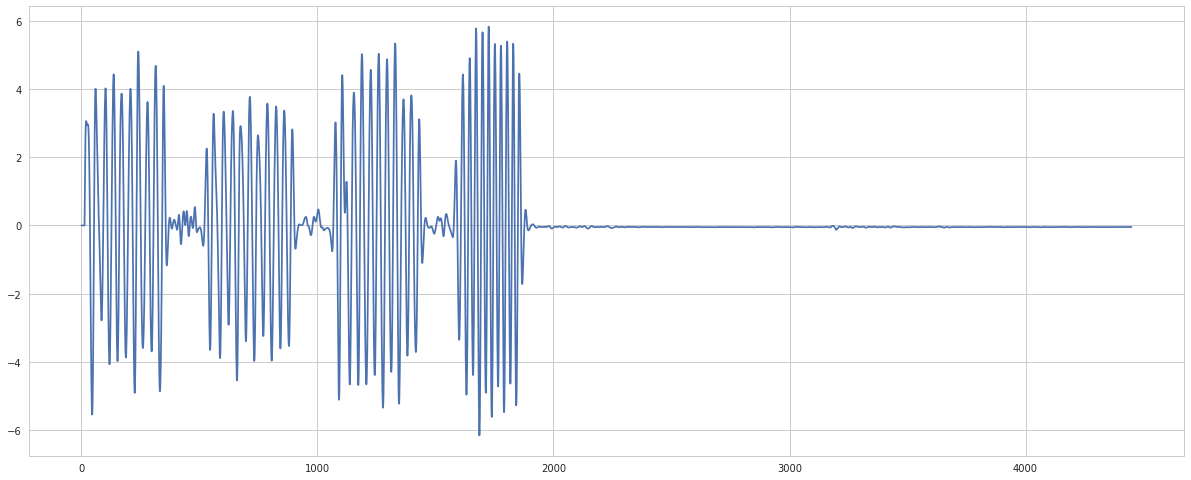

In [5]:
# let's work on magnitude data from now on...
data = df.mag_sum_acc.values
plt.plot(data)

In [6]:
import sklearn.cluster as cluster
import tslearn.clustering as tscluster

In [7]:
ms = cluster.MeanShift(bin_seeding=False)

In [8]:
ac = cluster.AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

In [9]:
sc = cluster.SpectralClustering(n_clusters=6, eigen_solver='arpack', affinity="nearest_neighbors", gamma=0.5)
sc = cluster.SpectralClustering(n_clusters=6, eigen_solver='arpack', affinity="rbf", gamma=0.1)

In [10]:
ap = cluster.AffinityPropagation(damping=0.5)#, preference=params['preference'])

In [11]:
b = cluster.Birch(n_clusters=6)

In [12]:
dbs = cluster.DBSCAN(eps=1)

In [13]:
def plot_clusters(data, clustering):
    CLR = ['red', 'green', 'blue', 'yellow', 'magenta', 'orange', 'purple'] * 10
    peaks, _ = sig.find_peaks(data)
    prominences = sig.peak_prominences(data, peaks)[0]
    
    clusters = clustering(prominences.reshape(-1, 1))
    
    contour_heights = data[peaks] - prominences
    colors = [CLR[i] for i in clusters]
    plt.plot(data)
    plt.scatter(peaks, data[peaks], color=colors)
    plt.vlines(x=peaks, ymin=contour_heights, ymax=data[peaks], color=colors)
    
    return peaks, prominences, clusters

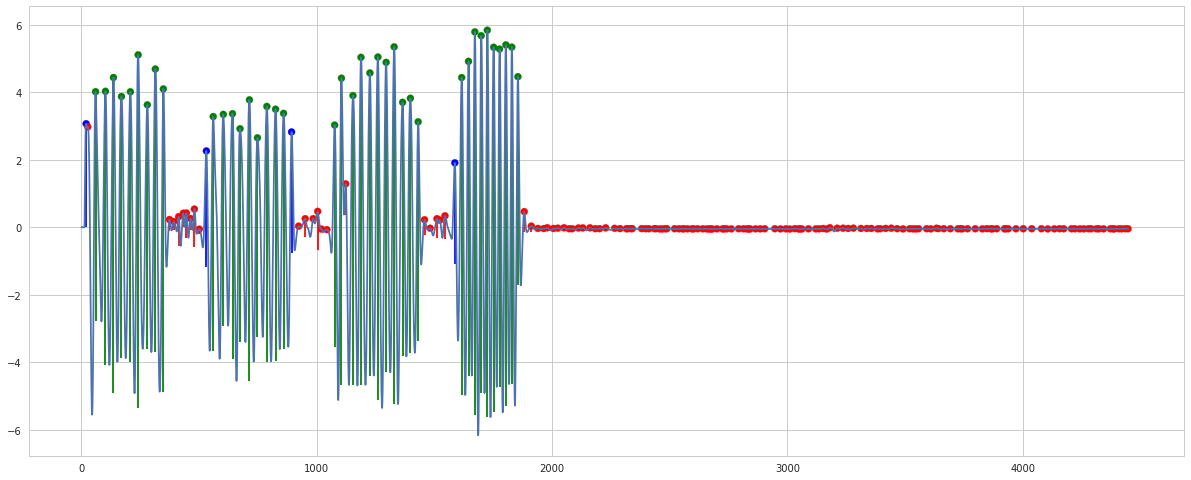

In [15]:
plot_clusters(data, ms.fit_predict);

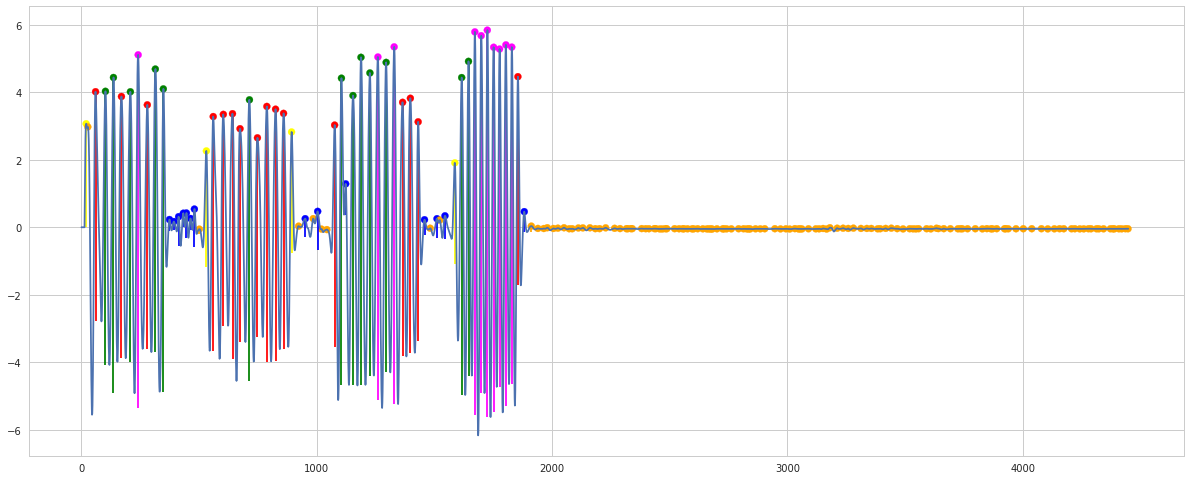

In [16]:
plot_clusters(data, ac.fit_predict);

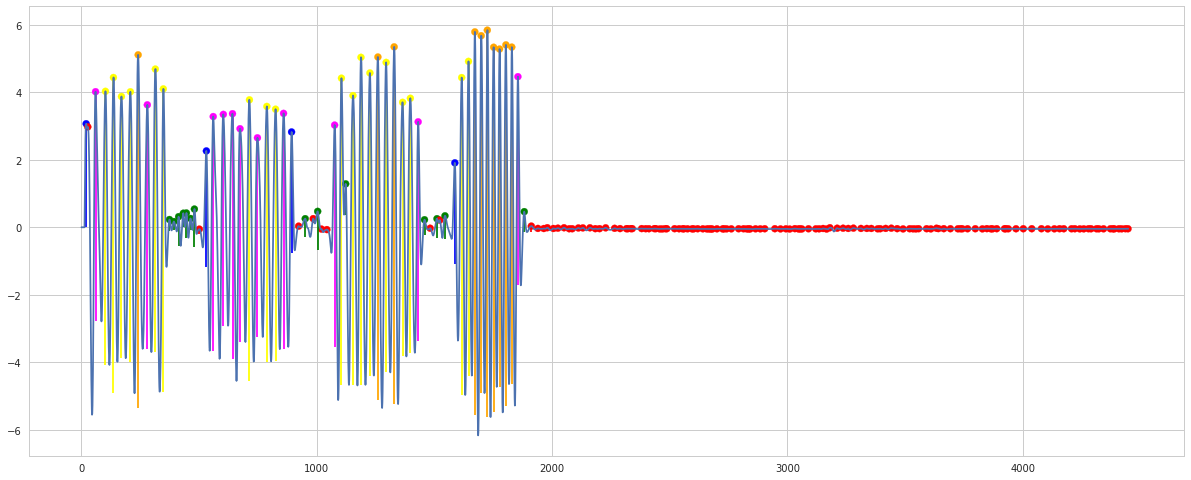

In [17]:
plot_clusters(data, sc.fit_predict);

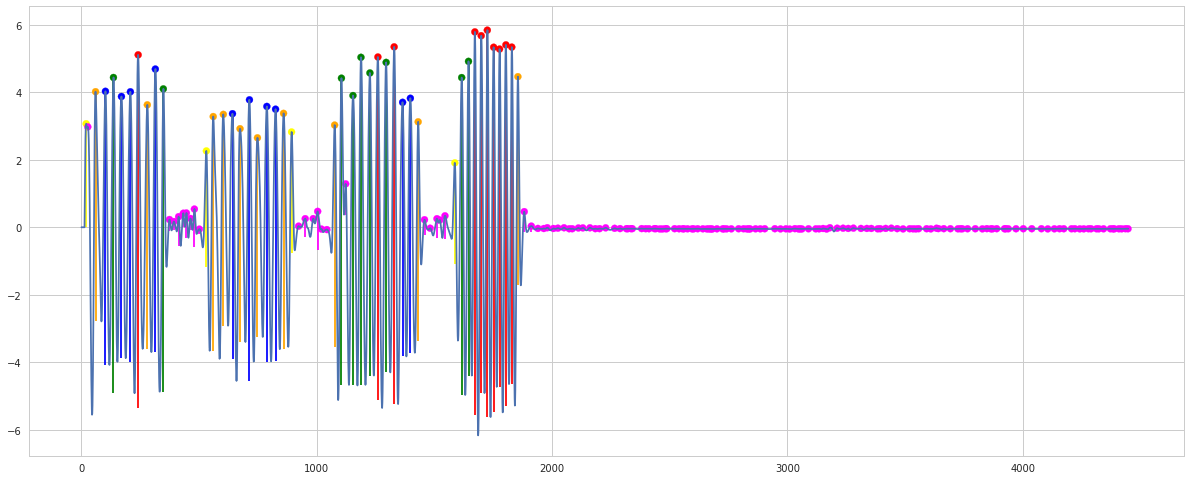

In [18]:
plot_clusters(data, b.fit_predict);

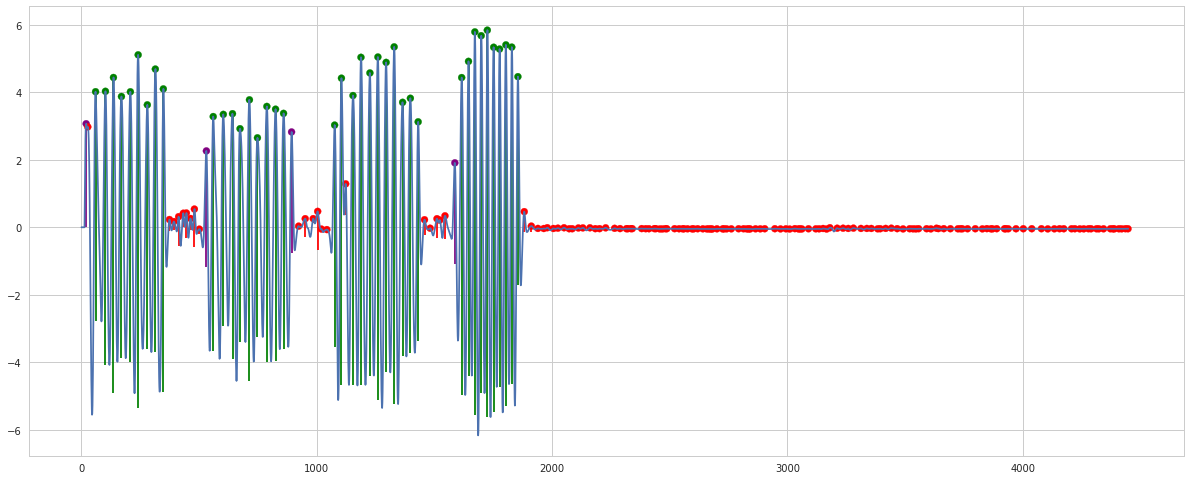

In [19]:
plot_clusters(data, dbs.fit_predict);

In [26]:
tskm = tscluster.TimeSeriesKMeans(n_clusters=6, metric='dtw', tol=0.1, dtw_inertia=False)

0.080 --> 0.065 --> 


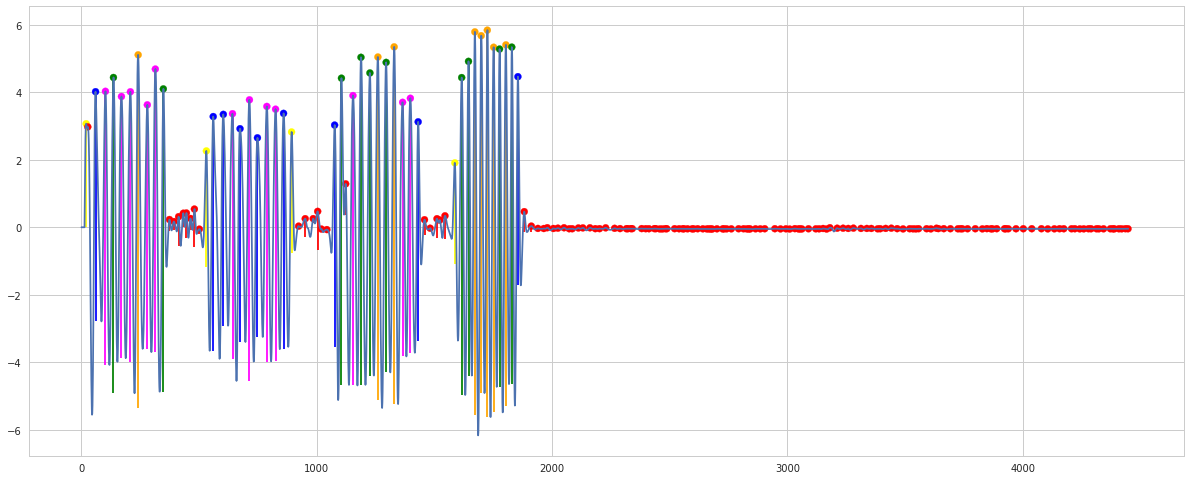

In [25]:
plot_clusters(data, tskm.fit_predict);

In [186]:
gakm = tscluster.GlobalAlignmentKernelKMeans(n_clusters=6, sigma=0.5, n_init=100, verbose=False)

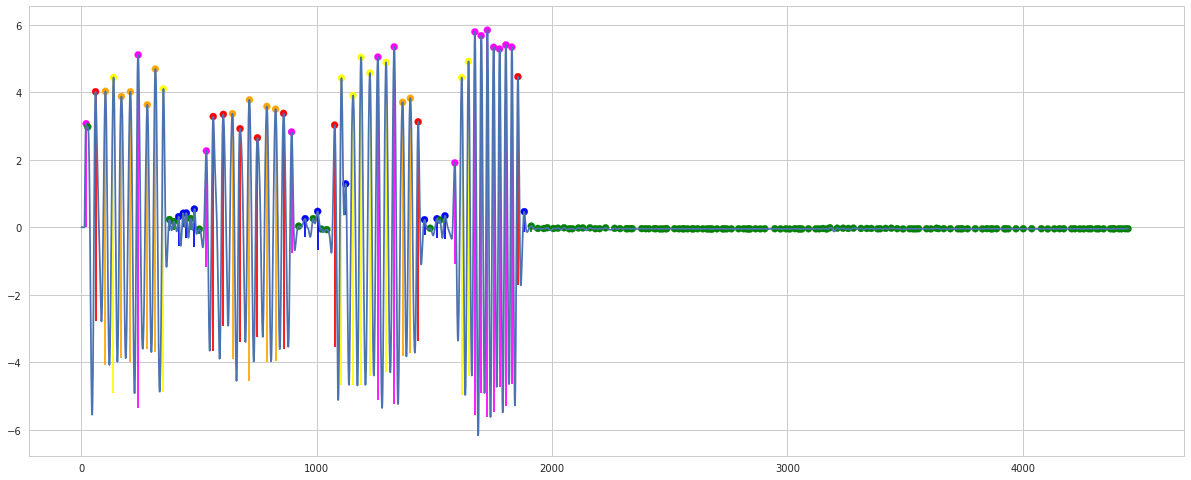

In [190]:
ppc = plot_clusters(data, gakm.fit_predict)

In [20]:
peaks, promi, clu = ppc

NameError: name 'ppc' is not defined